# Problem Statement

Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every now and then depending on various factors like timing of the flights, destination, and duration of flights various occasions such as vacations or festive season. Therefore, having some basic idea of the flight fares before planning the trip will surely help many people save money and time

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
train=pd.read_excel(r'C:\Users\Dr. Poonam\Documents\Priyanshu Gupta\Machine Learning All Datasets\Data_Train.xlsx')
sample=pd.read_excel(r"C:\Users\Dr. Poonam\Documents\Priyanshu Gupta\Machine Learning All Datasets\Sample_submission.xlsx")

In [3]:
test=pd.read_excel(r'C:\Users\Dr. Poonam\Documents\Priyanshu Gupta\Machine Learning All Datasets\Test_set.xlsx')

In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [8]:
train.shape , test.shape

((10683, 11), (2671, 10))

In [9]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [10]:
train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [12]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
# combine Both Datasets Together 

In [14]:
train.shape , test.shape

((10683, 11), (2671, 10))

In [15]:
df=train.append(test)

In [16]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0


In [17]:
df["day_of_Journey"]=pd.to_datetime(df["Date_of_Journey"]).dt.day
df["month_of_Journey"]=pd.to_datetime(df["Date_of_Journey"]).dt.month


In [18]:
df["Dep_Hour"]=pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_minute"]=pd.to_datetime(df["Dep_Time"]).dt.minute

In [19]:
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"]).dt.hour
df["Arrival_Time"]=pd.to_datetime(df["Arrival_Time"]).dt.minute

In [20]:
def preprocessor(x):
    if "h" not in x:
        x="0h"+" "+x
    elif "m" not in x:
        x= x+" "+"0m"
    return x

In [21]:
df["Duration"]=df["Duration"].apply(preprocessor)

In [22]:
df["dur_hour"]=df["Duration"].apply(lambda x:x.split()[0])
df["dur_min"]=df["Duration"].apply(lambda x:x.split()[1])
df["dur_hour"]=df["dur_hour"].apply(lambda x:int(x.replace("h" , "")))
df["dur_min"]=df["dur_min"].apply(lambda x:int(x.replace("m" , "")))

In [23]:
df["dur_hour"]=df["dur_hour"].astype(object)
df["dur_min"]=df["dur_min"].astype(object)

In [24]:
def change(x):
    return str(x)

In [25]:
df["dur_hour"]=df["dur_hour"].apply(change)

In [26]:
df["dur_min"]=df["dur_min"].apply(change)

In [27]:
df["Total_Hrs"]=df["dur_hour"]+"."+df["dur_min"]

In [28]:
df["Total_Hrs"]=df["dur_hour"]+"."+df["dur_min"]

In [29]:
df["Total_Hrs"]=df["Total_Hrs"].astype(float)

In [30]:
df["Total_Stops"]=df["Total_Stops"].replace({"non-stop":0 , "1 stop":1 , "2 stops":2, "3 stops":3 , "4 stops":4})

# Exploratary Data Analysis

In [31]:
count=df["Airline"].value_counts()

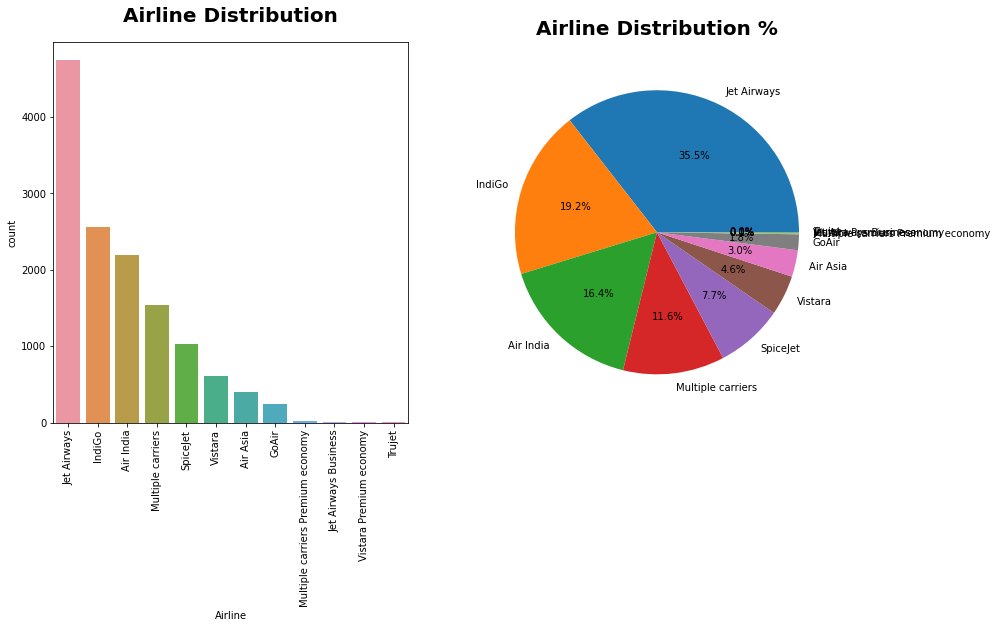

In [32]:
plt.figure(figsize=(14,7))

plt.subplot(1,2,1)
sns.countplot(x="Airline" , order=df["Airline"].value_counts().index  , data=df)
plt.title("Airline Distribution" , fontweight="black" , size=20 , pad=20)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.pie(count.values , labels=count.index , autopct="%1.1f%%" , colors=sns.set_palette("Set2"))
plt.title("Airline Distribution %" , fontweight="black" , size=20 , pad=20)

plt.show()

# 2 Airline Vs Price

In [33]:
temp1=df.groupby("Airline")["Price"].mean().reset_index().sort_values("Price" , ascending=False)

In [34]:
temp1.head(1)

,Airline,Price
5,Jet Airways Business,58358.666667


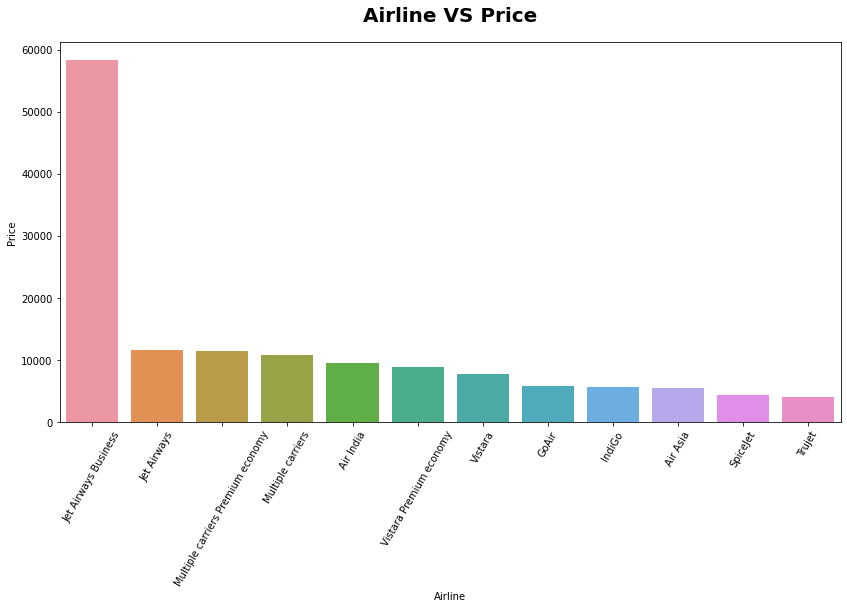

In [35]:
plt.figure(figsize=(14,7))
sns.barplot(x="Airline" , y="Price" , data=temp1)
plt.title("Airline VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

In [36]:
temp1

,Airline,Price
5,Jet Airways Business,58358.666667
4,Jet Airways,11643.923357
7,Multiple carriers Premium economy,11418.846154
6,Multiple carriers,10902.678094
1,Air India,9611.210616
11,Vistara Premium economy,8962.333333
10,Vistara,7796.348643
2,GoAir,5861.056701
3,IndiGo,5673.682903
0,Air Asia,5590.260188


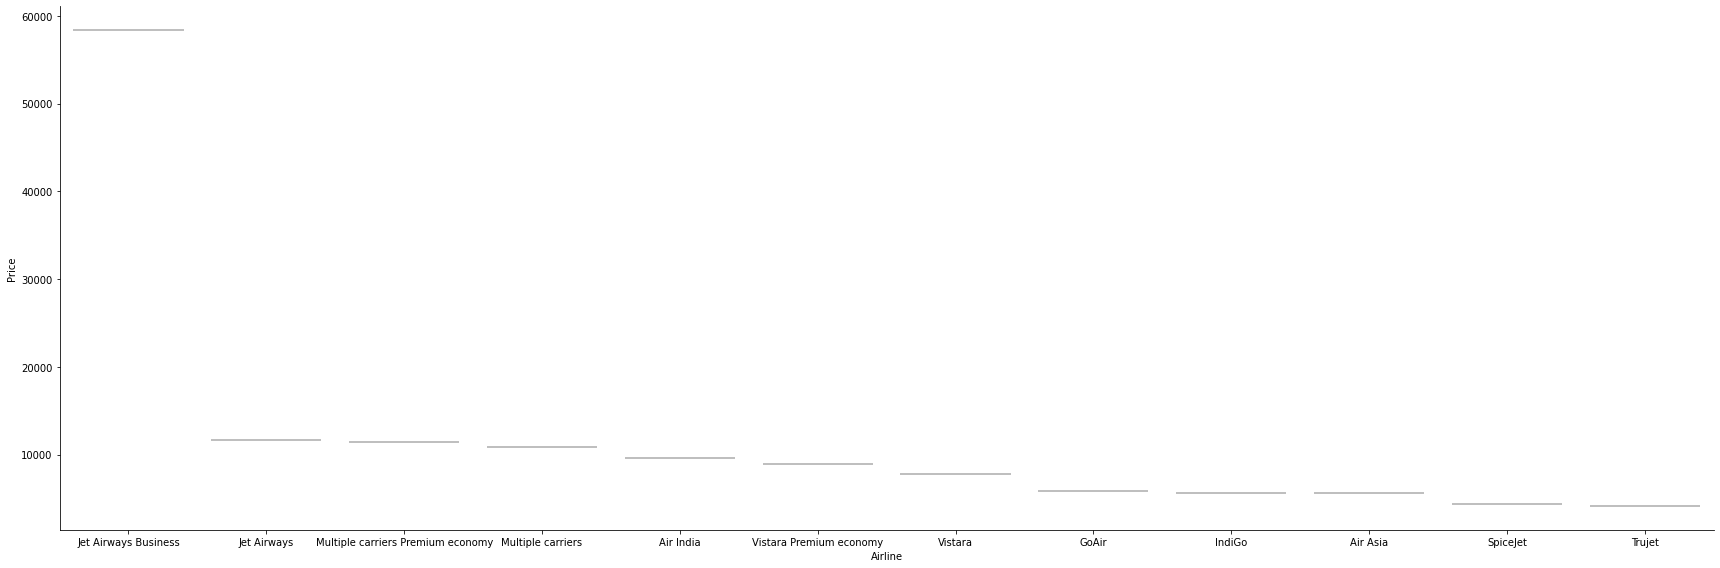

In [37]:
sns.catplot(y="Price" , x="Airline" , data=temp1  , kind="boxen" , height=8  , aspect=3)
plt.show()

# 3.Visualiztion Source Features

In [38]:
def Plot(m):
    plt.figure(figsize=(14,7))

    plt.subplot(1,2,1)
    sns.countplot(x=m , order=df[m].value_counts().index  , data=df)
    plt.title("{} Distribution".format(m) , fontweight="black" , size=20 , pad=20)
    plt.xticks(rotation=90)

    plt.subplot(1,2,2)
    plt.pie(df[m].value_counts().values , labels=df[m].value_counts().index , autopct="%1.1f%%" , colors=sns.set_palette("Set2"))
    plt.title("{} Distribution %".format(m) , fontweight="black" , size=20 , pad=20)

    plt.show()

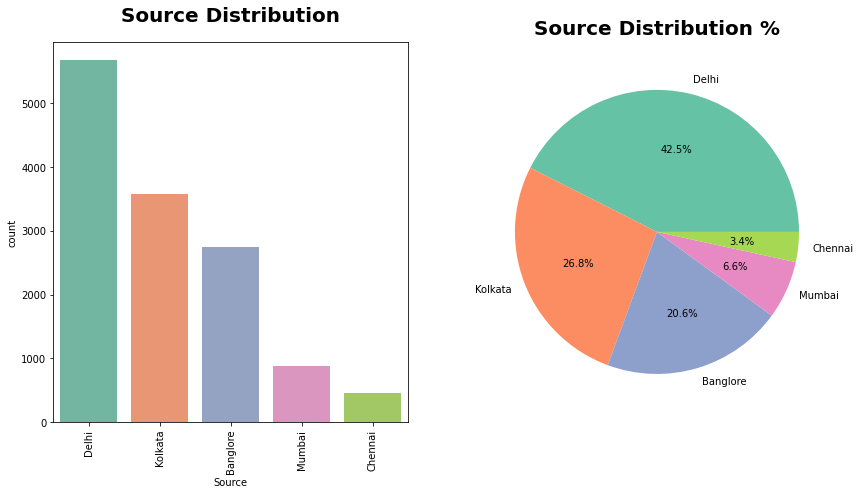

In [39]:
Plot("Source")

# 4. Source Vs Price

In [40]:
temp2=df.groupby("Source")["Price"].mean().reset_index().sort_values("Price" , ascending=False)

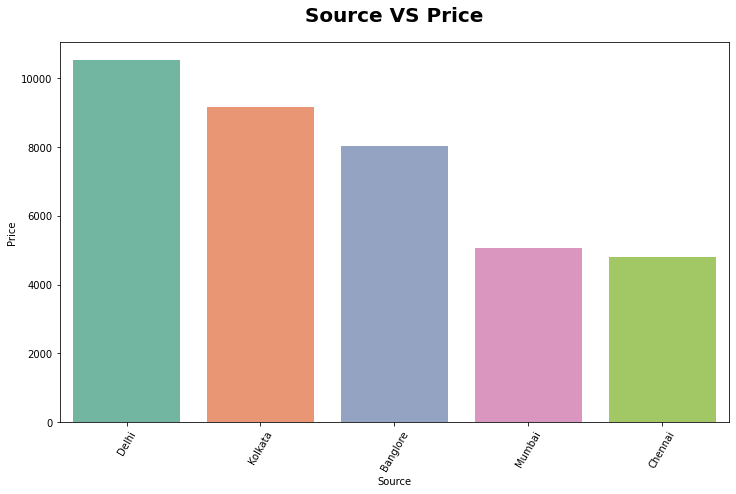

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(x="Source" , y="Price" , data=temp2)
plt.title("Source VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

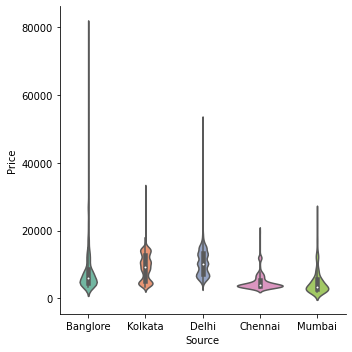

In [42]:
sns.catplot(y="Price" , x="Source" , data=df , kind="violin")

# Destination

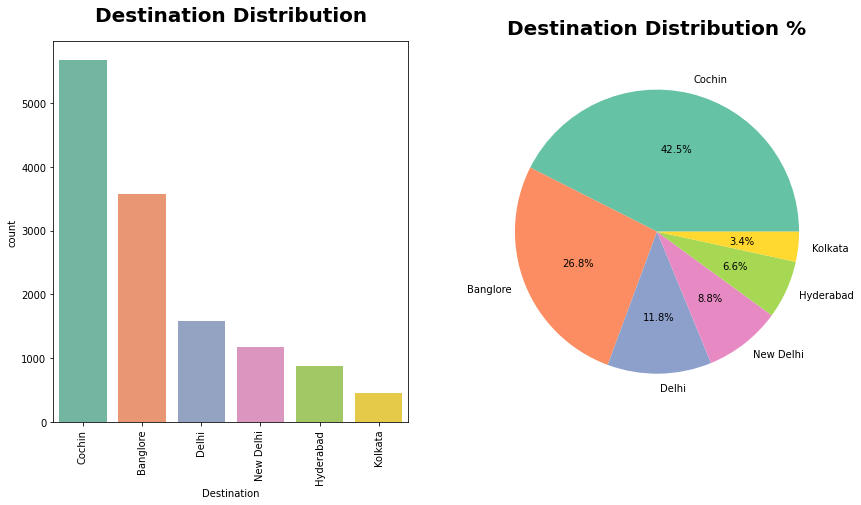

In [43]:
Plot("Destination")

# Destination VS Price

In [44]:
temp3=df.groupby("Destination")["Price"].mean().reset_index().sort_values("Price" , ascending=False)

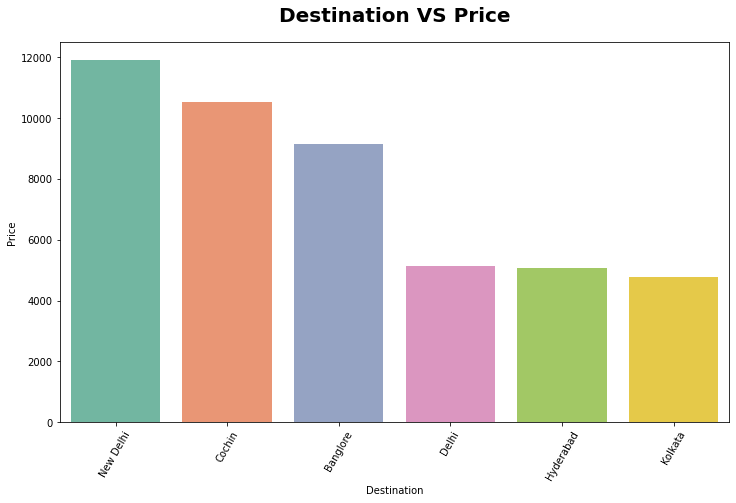

In [45]:
plt.figure(figsize=(12,7))
sns.barplot(x="Destination" , y="Price" , data=temp3)
plt.title("Destination VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

# Now Dep Hour

In [46]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_Hour,Dep_minute,dur_hour,dur_min,Total_Hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,2h 50m,0.0,No info,3897.0,24,3,22,20,2,50,2.5


In [47]:
df.corr()["Dep_Hour"]["Price"]

0.006818893828434688

<Axes: xlabel='Dep_Hour', ylabel='Price'>

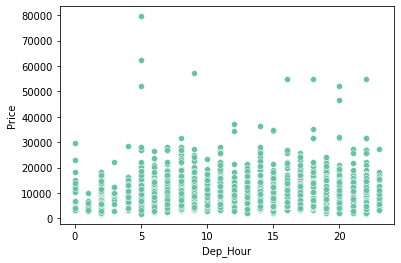

In [48]:
sns.scatterplot(x="Dep_Hour" , y="Price" , data=df)

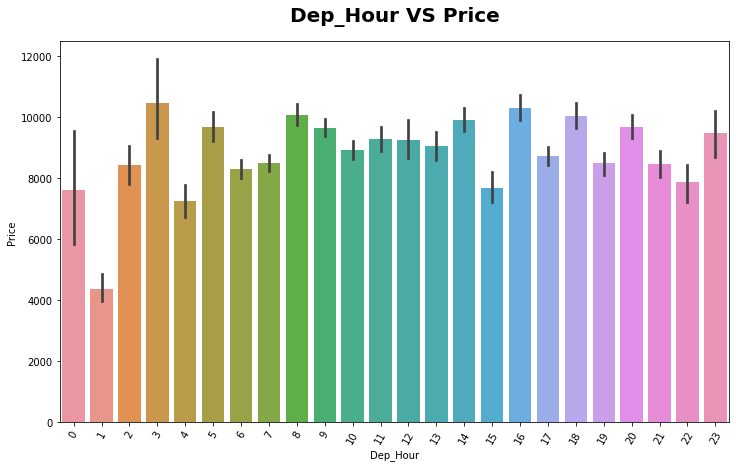

In [49]:
plt.figure(figsize=(12,7))
sns.barplot(x="Dep_Hour" , y="Price" , data=df)
plt.title("Dep_Hour VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

# Total Stops Vs Price

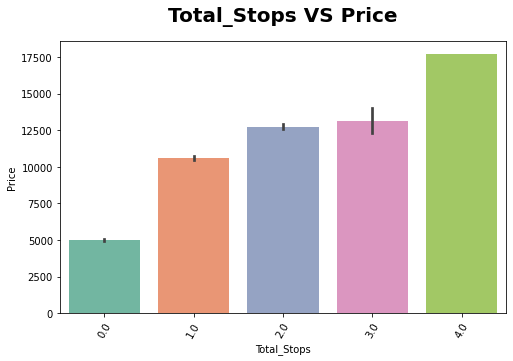

In [50]:
plt.figure(figsize=(8,5))
sns.barplot(x="Total_Stops" , y="Price" , data=df)
plt.title("Total_Stops VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

In [51]:
df.corr()["Total_Stops"]["Price"]

0.603896908806721

# Duration vs Price

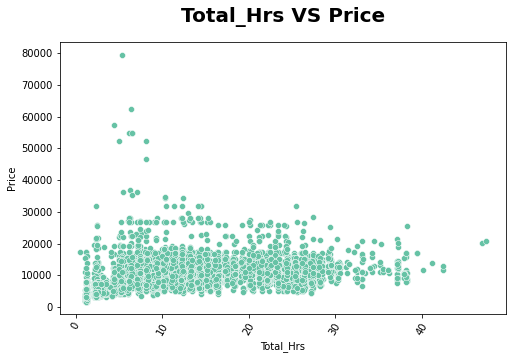

In [52]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Total_Hrs" , y="Price" , data=df)
plt.title("Total_Hrs VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

In [53]:
df.corr()["Total_Hrs"]["Price"]

0.5078939780541636

# Additional Info Vs Price

In [54]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
df["Additional_Info"]=df["Additional_Info"].replace("No info" , "No Info")

In [56]:
temp4=df.groupby("Additional_Info")["Price"].mean().reset_index().sort_values("Price" , ascending=False)

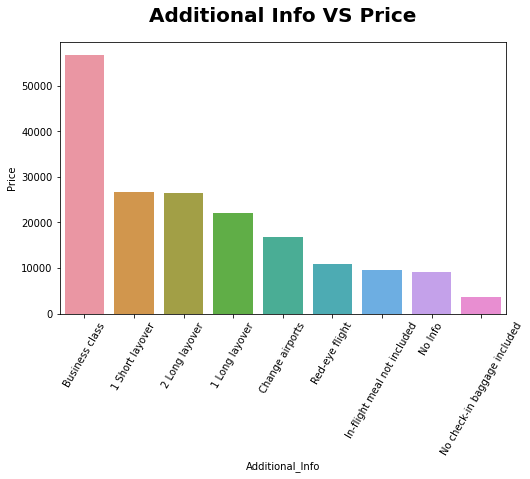

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x="Additional_Info" , y="Price" , data=temp4)
plt.title("Additional Info VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

# Journey Day Vs Price

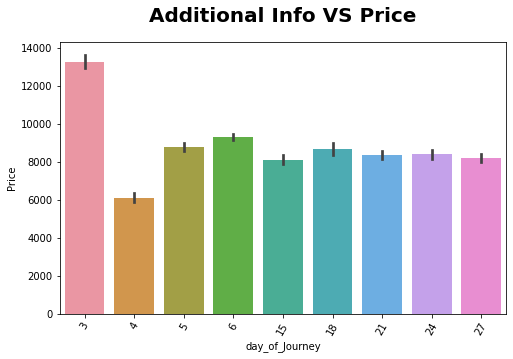

In [58]:
plt.figure(figsize=(8,5))
sns.barplot(x="day_of_Journey" , y="Price" , data=df)
plt.title("Additional Info VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

<Axes: xlabel='day_of_Journey', ylabel='Price'>

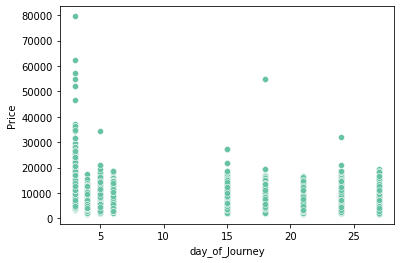

In [59]:
sns.scatterplot(x="day_of_Journey" , y="Price" , data=df)

In [60]:
df.corr()["Price"]["day_of_Journey"]

-0.1654124963715763

# Month_Of_Journey

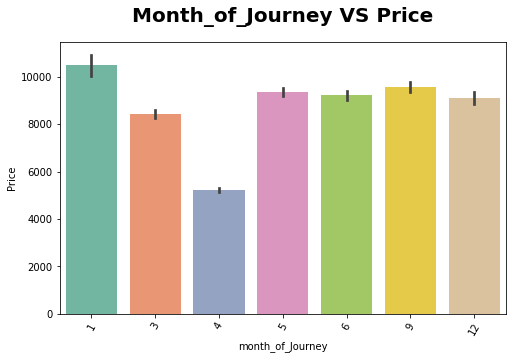

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x="month_of_Journey" , y="Price" , data=df)
plt.title("Month_of_Journey VS Price" , fontweight="black" , pad=20  , size=20)
plt.xticks(rotation=60)
plt.show()

In [62]:
df.corr()["Price"]["month_of_Journey"]

0.010700194346986297

In [63]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_Hour,Dep_minute,dur_hour,dur_min,Total_Hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,2h 50m,0.0,No Info,3897.0,24,3,22,20,2,50,2.5


# Target Featres Price

In [64]:
from scipy import stats as st
import pylab

<Axes: xlabel='Price', ylabel='Density'>

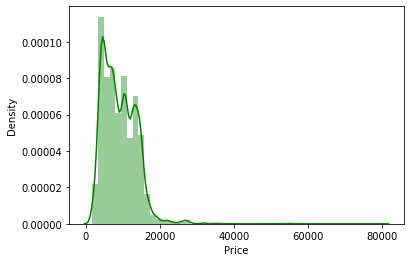

In [65]:
sns.distplot(df["Price"] , color="green" , kde=True)

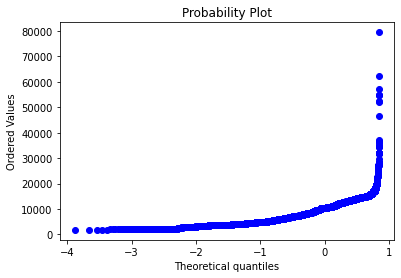

In [66]:
st.probplot(df["Price"] , dist='norm' , plot=pylab)
plt.show()

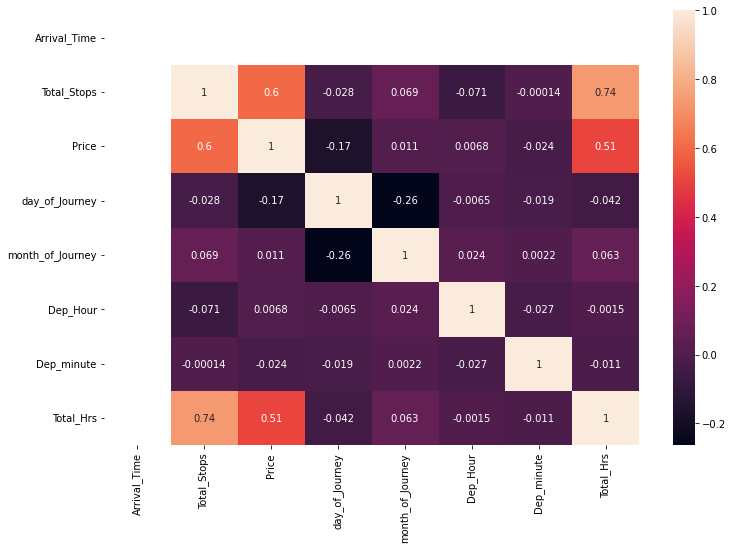

In [67]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True)
plt.show()

In [68]:
df[df.isna().any(axis=1)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_Hour,Dep_minute,dur_hour,dur_min,Total_Hrs
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,0,23h 40m,NaN,No Info,7480.0,5,6,9,45,23,40,23.40
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,0,10h 55m,1.0,No Info,NaN,6,6,17,30,10,55,10.55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,0,4h 0m,1.0,No Info,NaN,5,12,6,20,4,0,4.00
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,0,23h 45m,1.0,In-flight meal not included,NaN,21,5,19,15,23,45,23.45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,0,13h 0m,1.0,No Info,NaN,21,5,8,0,13,0,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,0,23h 55m,1.0,No Info,NaN,6,6,20,30,23,55,23.55
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,0,2h 35m,0.0,No Info,NaN,27,3,14,20,2,35,2.35
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,0,6h 35m,1.0,No Info,NaN,3,6,21,50,6,35,6.35
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,0,15h 15m,1.0,No Info,NaN,3,6,4,0,15,15,15.15


In [69]:
pd.DataFrame(df.corr()["Price"]).reset_index().sort_values("Price" , ascending=False)

,index,Price
2,Price,1.000000
1,Total_Stops,0.603897
7,Total_Hrs,0.507894
4,month_of_Journey,0.010700
5,Dep_Hour,0.006819
6,Dep_minute,-0.024492
3,day_of_Journey,-0.165412
0,Arrival_Time,NaN


In [70]:
# Column Need To Drop : Arrival_Time , day_of_Journey , Dep_minute , Dep_hour
# Column Need To model Building : Price , Total_Stops , Total_Hrs , 

In [71]:
df.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day_of_Journey,month_of_Journey,Dep_Hour,Dep_minute,dur_hour,dur_min,Total_Hrs
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,0,2h 50m,0.0,No Info,3897.0,24,3,22,20,2,50,2.5


In [72]:
df=df.drop(["Arrival_Time" , "day_of_Journey" , "Dep_Time" , "Dep_minute" , "dur_hour" , "dur_min"] , axis=1)

In [73]:
df=df.drop(["Date_of_Journey" , "Route" , "Duration"] , axis=1)

In [74]:
temp_test=df[df.isna().any(axis=1)]

In [75]:
temp_test=temp_test.drop("Price" , axis=1)

In [76]:
temp_test=temp_test.dropna()

In [77]:
temp_train=df.dropna()

In [78]:
temp_train.shape , temp_test.shape , df.shape

((10682, 9), (2671, 8), (13354, 9))

# Now Model Building Without Scaling and OutLiers Removing

In [79]:
temp_train.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month_of_Journey,Dep_Hour,Total_Hrs
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897.0,3,22,2.5


In [80]:
x=temp_train.drop("Price" , axis=1)
y=temp_train["Price"]

In [81]:
x_train ,x_test , y_train , y_test =train_test_split(x,y , test_size=0.2)

In [82]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8545, 8), (2137, 8), (8545,), (2137,))

In [83]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , BaggingRegressor , AdaBoostRegressor , VotingRegressor ,ExtraTreesRegressor , GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

In [84]:
lr=LinearRegression()
ls=Lasso()
rid=Ridge()
support=SVR()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
br=BaggingRegressor()
abr=AdaBoostRegressor()
#vr=VotingRegressor()
etr=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
knr=KNeighborsRegressor()

In [85]:
x.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,month_of_Journey,Dep_Hour,Total_Hrs
0,IndiGo,Banglore,New Delhi,0.0,No Info,3,22,2.5


In [86]:
step1=ColumnTransformer(transformers=[
    ("col_tnf" , OneHotEncoder(sparse=False , drop="first" , handle_unknown="ignore") ,[0,1,2,4]),
    
       
    
] , remainder="passthrough" )

In [87]:
step2=lr

In [88]:
pipe=Pipeline([
    ("step1" , step1),
    ("step2" , step2)    
])

In [89]:
training_score_r2=[]
test_score_r2=[]

mse=[]
mae=[]

In [90]:
def predictor(model):
    pipe=Pipeline([
    ("step1" , step1),
    ("step2" , model)    
    ])
    pipe.fit(x_train , y_train)
    y_pred_train=pipe.predict(x_train)
    y_pred=pipe.predict(x_test)
    a=r2_score(y_train , y_pred_train)
    b=r2_score(y_test , y_pred)
    training_score_r2.append(a)
    test_score_r2.append(b)
    
    mse.append(mean_squared_error(y_test , y_pred))
    mae.append(mean_absolute_error(y_test , y_pred))
    
    print(f"r2 Score of {model} model on Training data is " , a)
    print("-"*100)
    print(f"r2 Score of {model} model on test data is " , b)
    print("-"*100)
    print("Mean Square Error of Model is" , mean_squared_error(y_test , y_pred))
    print("-"*100)
    print("Mean Absolute Error of Model is " , mean_absolute_error(y_test , y_pred))

# LinearRegression Model

In [91]:
predictor(lr)

r2 Score of LinearRegression() model on Training data is  0.6659090205318464
----------------------------------------------------------------------------------------------------
r2 Score of LinearRegression() model on test data is  0.694980326038652
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6437943.130143747
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1752.0373479176415


In [92]:
regressor=[lr , ls , rid , support , dtr , rfr , br , abr , etr , gbr , knr]
Algorithms=["Linear_Regression" , "Lasso(L1)" , "Ridge" , "SVR" , "DecisionTreeRegressor" , "RandomForestRegressor" , "BaggingRegressor" , "AdaboostRegressor" , "ExtraTreeRegressor" , "GradientBoostREgressor" , "KNN_Regressor"]

# Lasso Regression

In [93]:
predictor(ls)

r2 Score of Lasso() model on Training data is  0.6649862325839062
----------------------------------------------------------------------------------------------------
r2 Score of Lasso() model on test data is  0.6958350915585552
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6419901.8945235135
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1750.6825748063573


# Ridge Regression

In [94]:
predictor(rid)

r2 Score of Ridge() model on Training data is  0.6640642025572678
----------------------------------------------------------------------------------------------------
r2 Score of Ridge() model on test data is  0.6965473009654111
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6404869.540713203
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1750.9821535216345


# Support Vector Regression

In [95]:
predictor(support)

r2 Score of SVR() model on Training data is  0.10036964549952143
----------------------------------------------------------------------------------------------------
r2 Score of SVR() model on test data is  0.1296641168520416
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 18369873.808664627
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  3184.914375806386


# Decision Tree Regression

In [96]:
predictor(dtr)

r2 Score of DecisionTreeRegressor() model on Training data is  0.9492734963401265
----------------------------------------------------------------------------------------------------
r2 Score of DecisionTreeRegressor() model on test data is  0.6987722924507764
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6357907.426886897
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1258.5823901998795


# Random Forest Regressor 

In [97]:
predictor(rfr)

r2 Score of RandomForestRegressor() model on Training data is  0.9328797281354912
----------------------------------------------------------------------------------------------------
r2 Score of RandomForestRegressor() model on test data is  0.8039818166393591
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4137286.951233873
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1119.880750588408


# Bagging Regressor

In [98]:
predictor(br)

r2 Score of BaggingRegressor() model on Training data is  0.9235753136278975
----------------------------------------------------------------------------------------------------
r2 Score of BaggingRegressor() model on test data is  0.7923869086229898
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4382016.602404156
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1145.6966972018909


# Ada Boost Regressor

In [99]:
predictor(abr)

r2 Score of AdaBoostRegressor() model on Training data is  0.33339913902860985
----------------------------------------------------------------------------------------------------
r2 Score of AdaBoostRegressor() model on test data is  0.29545025364875943
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 14870684.046240479
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  3254.4577601128694


# Extra Tree Regressor

In [100]:
predictor(etr)

r2 Score of ExtraTreesRegressor() model on Training data is  0.9492734844252008
----------------------------------------------------------------------------------------------------
r2 Score of ExtraTreesRegressor() model on test data is  0.7780137267587814
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4685386.3039031895
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1167.94771183457


# Gradient Boost regressor

In [101]:
predictor(gbr)

r2 Score of GradientBoostingRegressor() model on Training data is  0.7712223237953071
----------------------------------------------------------------------------------------------------
r2 Score of GradientBoostingRegressor() model on test data is  0.7837430351746331
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4564459.803401517
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1437.0102132346262


# K Nearest Neighbors regressor

In [102]:
predictor(knr)

r2 Score of KNeighborsRegressor() model on Training data is  0.7628342061534136
----------------------------------------------------------------------------------------------------
r2 Score of KNeighborsRegressor() model on test data is  0.6693256530126404
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6979427.303341132
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1616.1009826860084


In [103]:
len(Algorithms) , len(mae) , len(mse) , len(training_score_r2) , len(test_score_r2)

(11, 11, 11, 11, 11)

In [104]:
report2=pd.DataFrame({"Algorithms":Algorithms , "Mean_absolute_error":mae , "Mean_squared_error":mse, "Training_data_r2":training_score_r2 , "Test_data_r2":test_score_r2})

In [105]:
report2

,Algorithms,Mean_absolute_error,Mean_squared_error,Training_data_r2,Test_data_r2
0,Linear_Regression,1752.037348,6.437943e+06,0.665909,0.694980
1,Lasso(L1),1750.682575,6.419902e+06,0.664986,0.695835
2,Ridge,1750.982154,6.404870e+06,0.664064,0.696547
3,SVR,3184.914376,1.836987e+07,0.100370,0.129664
4,DecisionTreeRegressor,1258.582390,6.357907e+06,0.949273,0.698772
5,RandomForestRegressor,1119.880751,4.137287e+06,0.932880,0.803982
6,BaggingRegressor,1145.696697,4.382017e+06,0.923575,0.792387
7,AdaboostRegressor,3254.457760,1.487068e+07,0.333399,0.295450
8,ExtraTreeRegressor,1167.947712,4.685386e+06,0.949273,0.778014
9,GradientBoostREgressor,1437.010213,4.564460e+06,0.771222,0.783743


# Now we Will do It After Scaling 

In [106]:
sc_mae=[]
sc_mse=[]
tr_r2=[]
test_r2=[]

In [107]:
len(sc_mae) , len(sc_mse) , len(tr_r2) , len(test_r2)

(0, 0, 0, 0)

In [108]:
Step1=ColumnTransformer(transformers=[
    ("col_tnf" , OneHotEncoder(sparse=False , drop="first" , handle_unknown="ignore") ,[0,1,2,4]),
       
    
] , remainder="passthrough" )
Step2=StandardScaler()

In [109]:
def Predictor(model):
    pipe=Pipeline([
    ("Step1" , Step1),
    ("Step2" , Step2),
    ("Step3" , model)    
    ])
    pipe.fit(x_train , y_train)
    y_pred_train=pipe.predict(x_train)
    y_pred=pipe.predict(x_test)
    a=r2_score(y_train , y_pred_train)
    b=r2_score(y_test , y_pred)
    tr_r2.append(a)
    test_r2.append(b)
    
    sc_mse.append(mean_squared_error(y_test , y_pred))
    sc_mae.append(mean_absolute_error(y_test , y_pred))
    
    print(f"r2 Score of {model} model on Training data is " , a)
    print("-"*100)
    print(f"r2 Score of {model} model on test data is " , b)
    print("-"*100)
    print("Mean Square Error of Model is" , mean_squared_error(y_test , y_pred))
    print("-"*100)
    print("Mean Absolute Error of Model is " , mean_absolute_error(y_test , y_pred))

In [110]:
regressor

[LinearRegression(),
 Lasso(),
 Ridge(),
 SVR(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 BaggingRegressor(),
 AdaBoostRegressor(),
 ExtraTreesRegressor(),
 GradientBoostingRegressor(),
 KNeighborsRegressor()]

# Linear Regressor

In [111]:
Predictor(lr)

r2 Score of LinearRegression() model on Training data is  0.6659220668760378
----------------------------------------------------------------------------------------------------
r2 Score of LinearRegression() model on test data is  0.6951678164080096
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6433985.836767562
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1749.6994906881287


In [112]:
regressor=[lr , ls , rid , support , dtr , rfr , br , abr , etr , gbr , knr]

# Ridge()

In [113]:
Predictor(ls)

r2 Score of Lasso() model on Training data is  0.6659879897225608
----------------------------------------------------------------------------------------------------
r2 Score of Lasso() model on test data is  0.6956053818132095
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6424750.297440507
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1750.6036617422233


# Lasso

In [114]:
Predictor(rid)

r2 Score of Ridge() model on Training data is  0.6660122831215177
----------------------------------------------------------------------------------------------------
r2 Score of Ridge() model on test data is  0.695544672476263
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6426031.668093274
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1750.4212514456312


# Support

In [115]:
Predictor(support)

r2 Score of SVR() model on Training data is  0.07219120527459089
----------------------------------------------------------------------------------------------------
r2 Score of SVR() model on test data is  0.08918682048641291
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 19224213.886730917
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  3323.8504723710166


# Decision Tree Regressor

In [116]:
Predictor(dtr)

r2 Score of DecisionTreeRegressor() model on Training data is  0.9492734963401265
----------------------------------------------------------------------------------------------------
r2 Score of DecisionTreeRegressor() model on test data is  0.7194857400329908
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 5920715.963688336
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1251.234972814582


# Random Forest Regressor

In [117]:
Predictor(rfr)

r2 Score of RandomForestRegressor() model on Training data is  0.9322910171169327
----------------------------------------------------------------------------------------------------
r2 Score of RandomForestRegressor() model on test data is  0.8074500081204392
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4064085.051731248
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1113.259009360863


# Bagging Regressor

In [118]:
Predictor(br)

r2 Score of BaggingRegressor() model on Training data is  0.925962871841149
----------------------------------------------------------------------------------------------------
r2 Score of BaggingRegressor() model on test data is  0.7967506568183377
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4289912.501868406
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1142.7406863933004


# AdaBoostRegressor

In [119]:
Predictor(abr)

r2 Score of AdaBoostRegressor() model on Training data is  0.33135820277152084
----------------------------------------------------------------------------------------------------
r2 Score of AdaBoostRegressor() model on test data is  0.27321920661894317
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 15339906.94797253
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  3261.144411096447


# Extra Tree Regressor

In [120]:
Predictor(etr)

r2 Score of ExtraTreesRegressor() model on Training data is  0.9492734714351734
----------------------------------------------------------------------------------------------------
r2 Score of ExtraTreesRegressor() model on test data is  0.7788879334089068
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4666934.7311754115
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1163.317385681975


# Gradient Boost Regressor

In [121]:
Predictor(gbr)

r2 Score of GradientBoostingRegressor() model on Training data is  0.7712223237953071
----------------------------------------------------------------------------------------------------
r2 Score of GradientBoostingRegressor() model on test data is  0.7837518204017595
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4564274.376698083
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1436.7984691379463


# K Nearest Regressor

In [122]:
Predictor(knr)

r2 Score of KNeighborsRegressor() model on Training data is  0.8276916448522564
----------------------------------------------------------------------------------------------------
r2 Score of KNeighborsRegressor() model on test data is  0.768828633249304
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4879252.84664483
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1308.1970987365466


In [123]:
sc_report=pd.DataFrame({"Algorithms":Algorithms , "SC_Mean_absolute_error":sc_mae , "SC_Mean_squared_error":sc_mse, "SC_Training_data_r2":tr_r2 , "SC_Test_data_r2":test_r2})

In [124]:
Final=pd.concat([sc_report , report2] , axis=1)

In [125]:
Final[["Algorithms" , "SC_Test_data_r2" , "Test_data_r2"]]

,Algorithms,Algorithms,SC_Test_data_r2,Test_data_r2
0,Linear_Regression,Linear_Regression,0.695168,0.694980
1,Lasso(L1),Lasso(L1),0.695605,0.695835
2,Ridge,Ridge,0.695545,0.696547
3,SVR,SVR,0.089187,0.129664
4,DecisionTreeRegressor,DecisionTreeRegressor,0.719486,0.698772
5,RandomForestRegressor,RandomForestRegressor,0.807450,0.803982
6,BaggingRegressor,BaggingRegressor,0.796751,0.792387
7,AdaboostRegressor,AdaboostRegressor,0.273219,0.295450
8,ExtraTreeRegressor,ExtraTreeRegressor,0.778888,0.778014
9,GradientBoostREgressor,GradientBoostREgressor,0.783752,0.783743


In [126]:
import catboost

In [127]:
CB=catboost.CatBoostRegressor(verbose=False)

In [128]:
Predictor(CB)

r2 Score of <catboost.core.CatBoostRegressor object at 0x00000251912B1F30> model on Training data is  0.8629942931942053
----------------------------------------------------------------------------------------------------
r2 Score of <catboost.core.CatBoostRegressor object at 0x00000251912B1F30> model on test data is  0.8274866444824889
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 3641178.805248955
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1180.4356471988858


In [130]:
CB2=catboost.CatBoostRegressor(depth=8 , iterations=50 , learning_rate=0.6 , random_state=48)

In [131]:
Predictor(CB2)

0:	learn: 3087.7978125	total: 8.19ms	remaining: 401ms
1:	learn: 2659.7551376	total: 15.9ms	remaining: 382ms
2:	learn: 2445.3574219	total: 23.4ms	remaining: 366ms
3:	learn: 2336.2750787	total: 31.8ms	remaining: 366ms
4:	learn: 2289.5463188	total: 40.2ms	remaining: 362ms
5:	learn: 2260.3743991	total: 47.8ms	remaining: 351ms
6:	learn: 2255.7706324	total: 52.2ms	remaining: 321ms
7:	learn: 2227.3222316	total: 59.6ms	remaining: 313ms
8:	learn: 2188.3871889	total: 67.8ms	remaining: 309ms
9:	learn: 2176.1473145	total: 81.3ms	remaining: 325ms
10:	learn: 2121.8998700	total: 88.6ms	remaining: 314ms
11:	learn: 2090.7929271	total: 95.8ms	remaining: 303ms
12:	learn: 2078.8749327	total: 103ms	remaining: 293ms
13:	learn: 2076.4341618	total: 106ms	remaining: 274ms
14:	learn: 2069.8898005	total: 114ms	remaining: 266ms
15:	learn: 2039.0538705	total: 122ms	remaining: 259ms
16:	learn: 2029.0271833	total: 129ms	remaining: 251ms
17:	learn: 2025.3351037	total: 137ms	remaining: 244ms
18:	learn: 2012.0684058	to

In [132]:
step2=StandardScaler()

In [133]:
step2

StandardScaler()

In [134]:
pipe2=Pipeline([
    ("step1" , step1),
    ("step2" , step2),
    ("step3" , CB2 )
])

In [135]:
pipe2.fit(x_train , y_train )

0:	learn: 3087.7978125	total: 8.45ms	remaining: 414ms
1:	learn: 2659.7551376	total: 16ms	remaining: 385ms
2:	learn: 2445.3574219	total: 27.3ms	remaining: 428ms
3:	learn: 2336.2750787	total: 39.4ms	remaining: 453ms
4:	learn: 2289.5463188	total: 46.9ms	remaining: 422ms
5:	learn: 2260.3743991	total: 54.3ms	remaining: 398ms
6:	learn: 2255.7706324	total: 58.5ms	remaining: 360ms
7:	learn: 2227.3222316	total: 66.1ms	remaining: 347ms
8:	learn: 2188.3871889	total: 73.6ms	remaining: 335ms
9:	learn: 2176.1473145	total: 81.2ms	remaining: 325ms
10:	learn: 2121.8998700	total: 88.6ms	remaining: 314ms
11:	learn: 2090.7929271	total: 96.5ms	remaining: 306ms
12:	learn: 2078.8749327	total: 104ms	remaining: 295ms
13:	learn: 2076.4341618	total: 107ms	remaining: 276ms
14:	learn: 2069.8898005	total: 121ms	remaining: 282ms
15:	learn: 2039.0538705	total: 130ms	remaining: 276ms
16:	learn: 2029.0271833	total: 138ms	remaining: 268ms
17:	learn: 2025.3351037	total: 145ms	remaining: 258ms
18:	learn: 2012.0684058	tota

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('col_tnf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  [0, 1, 2, 4])])),
                ('step2', StandardScaler()),
                ('step3',
                 <catboost.core.CatBoostRegressor object at 0x0000025191ED64D0>)])

In [136]:
pipe2.predict([["Jet Airways" , "Banglore","Delhi", 0.0 , "No Info" , 4 , 7 , 3.0]])

array([7289.69400584])

In [137]:
#with open("Catboosting2.pkl" , 'wb') as f:
   # pickle.dump(pipe2 , f)

# Now We Will Do it After Treating Outliers

In [138]:
temp_train.head(1)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,month_of_Journey,Dep_Hour,Total_Hrs
0,IndiGo,Banglore,New Delhi,0.0,No Info,3897.0,3,22,2.5


In [139]:
num=temp_train.select_dtypes(exclude="object")
obj=temp_train.select_dtypes(include="object")

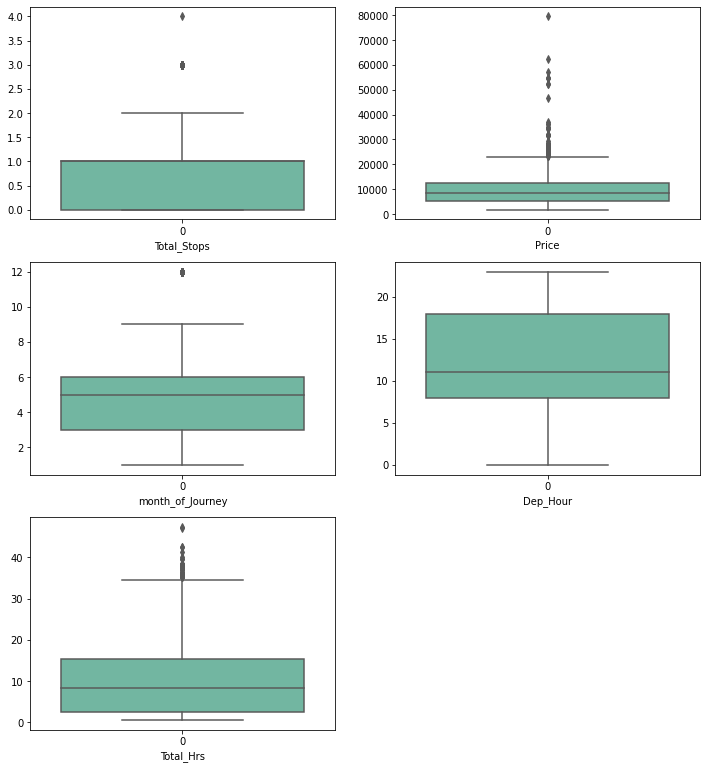

In [140]:
plt.figure(figsize=(12,18))
pltnumber=1
for i in num.columns:
    if pltnumber<=8:
        plt.subplot(4,2,pltnumber)
        sns.boxplot(num[i])
        plt.xlabel(i , fontsize=10)
        pltnumber=pltnumber+1

In [141]:
def outlier(df,col):
    iqr=df[col].quantile(0.75)-df[col].quantile(0.25)
    upper=df[col].quantile(0.75)+(iqr*1.5)
    lower=df[col].quantile(0.25)-(iqr*1.5)
    df.loc[df[col]<=lower , col]=lower
    df.loc[df[col]>=upper , col]=upper

In [142]:
col=num.columns

In [143]:
for i in col:
    outlier(num, i)

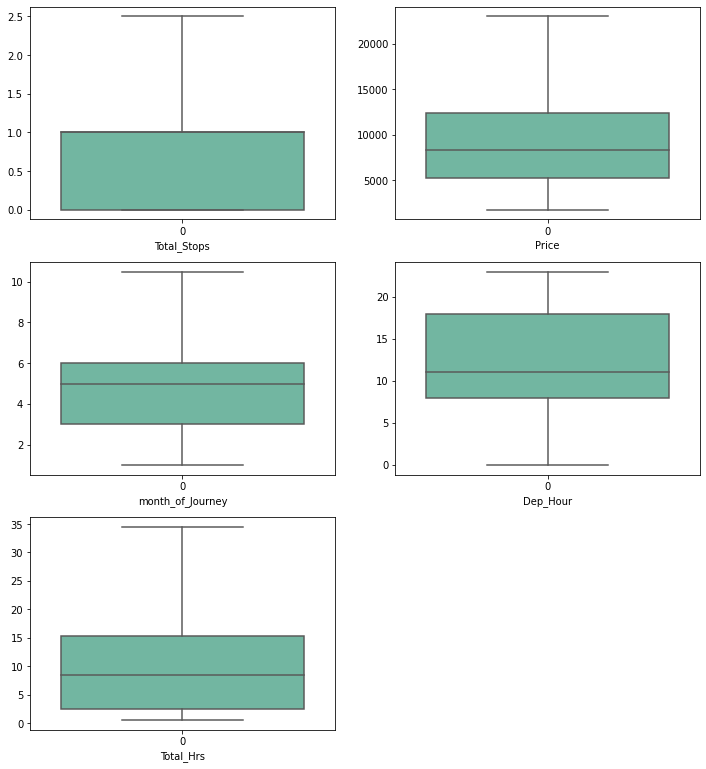

In [144]:
plt.figure(figsize=(12,18))
pltnumber=1
for i in num.columns:
    if pltnumber<=8:
        plt.subplot(4,2,pltnumber)
        sns.boxplot(num[i])
        plt.xlabel(i , fontsize=10)
        pltnumber=pltnumber+1

In [145]:
final_df=pd.concat([num , obj] , axis=1)

In [146]:
x=final_df.drop("Price" , axis=1)
y=final_df["Price"]

In [147]:
x_train  , x_test ,y_train , y_test =train_test_split(x , y , test_size=0.2)

In [148]:
step1=ColumnTransformer(transformers=[
    ("one_en" , OneHotEncoder(sparse=False , drop="first" , handle_unknown="ignore") , [4,5,6,7])
    
    
] , remainder="passthrough")
step2=StandardScaler()

In [149]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_en',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse=False),
                                 [4, 5, 6, 7])])

In [150]:
x_train.head(1)

,Total_Stops,month_of_Journey,Dep_Hour,Total_Hrs,Airline,Source,Destination,Additional_Info
8420,1.0,5.0,23,8.15,GoAir,Kolkata,Banglore,No Info


In [151]:
x.head(1)

,Total_Stops,month_of_Journey,Dep_Hour,Total_Hrs,Airline,Source,Destination,Additional_Info
0,0.0,3.0,22,2.5,IndiGo,Banglore,New Delhi,No Info


In [152]:
y_train.head(1)

8420    6945.0
Name: Price, dtype: float64

In [153]:
def predictor(model):
    pipe=Pipeline([
    ("step1" , step1),
    ("step2" , step2),
    ("Step3" , model)    
    ])
    pipe.fit(x_train , y_train)
    y_pred_train=pipe.predict(x_train)
    y_pred=pipe.predict(x_test)
    a=r2_score(y_train , y_pred_train)
    b=r2_score(y_test , y_pred)
    tr_r2.append(a)
    test_r2.append(b)
    
    sc_mse.append(mean_squared_error(y_test , y_pred))
    sc_mae.append(mean_absolute_error(y_test , y_pred))
    
    print(f"r2 Score of {model} model on Training data is " , a)
    print("-"*100)
    print(f"r2 Score of {model} model on test data is " , b)
    print("-"*100)
    print("Mean Square Error of Model is" , mean_squared_error(y_test , y_pred))
    print("-"*100)
    print("Mean Absolute Error of Model is " , mean_absolute_error(y_test , y_pred))

In [154]:
predictor(lr)

r2 Score of LinearRegression() model on Training data is  0.6863165379018921
----------------------------------------------------------------------------------------------------
r2 Score of LinearRegression() model on test data is  0.6738843944578847
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6043909.998119364
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1738.5885545973335


In [155]:
predictor(support)

r2 Score of SVR() model on Training data is  0.08973608461797589
----------------------------------------------------------------------------------------------------
r2 Score of SVR() model on test data is  0.07219704693995643
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 17194999.10150757
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  3317.0498860050047


In [156]:
predictor(dtr)

r2 Score of DecisionTreeRegressor() model on Training data is  0.9467856445992938
----------------------------------------------------------------------------------------------------
r2 Score of DecisionTreeRegressor() model on test data is  0.7226346708391281
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 5140419.708711462
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1220.0488111950442


In [157]:
predictor(rfr)

r2 Score of RandomForestRegressor() model on Training data is  0.9352518712400271
----------------------------------------------------------------------------------------------------
r2 Score of RandomForestRegressor() model on test data is  0.7886708507902362
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 3916569.2659194227
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1090.2347814396194


In [158]:
predictor(br)

r2 Score of BaggingRegressor() model on Training data is  0.9296506994516195
----------------------------------------------------------------------------------------------------
r2 Score of BaggingRegressor() model on test data is  0.7826827399174278
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4027547.0988073996
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1115.9118562130368


In [159]:
predictor(abr)

r2 Score of AdaBoostRegressor() model on Training data is  0.6397143275277666
----------------------------------------------------------------------------------------------------
r2 Score of AdaBoostRegressor() model on test data is  0.6304092422389692
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6849636.258072083
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1969.250149277248


In [160]:
predictor(etr)

r2 Score of ExtraTreesRegressor() model on Training data is  0.9467855665753154
----------------------------------------------------------------------------------------------------
r2 Score of ExtraTreesRegressor() model on test data is  0.7564566731802148
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4513595.556074241
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1151.300358858658


In [161]:
predictor(gbr)

r2 Score of GradientBoostingRegressor() model on Training data is  0.7846472987433813
----------------------------------------------------------------------------------------------------
r2 Score of GradientBoostingRegressor() model on test data is  0.7605128401826814
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4438422.495099447
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1421.464680126879


In [162]:
predictor(knr)

r2 Score of KNeighborsRegressor() model on Training data is  0.8448730919664281
----------------------------------------------------------------------------------------------------
r2 Score of KNeighborsRegressor() model on test data is  0.7600571352047283
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 4446868.08870379
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1263.206832007487


In [163]:
predictor(ls)

r2 Score of Lasso() model on Training data is  0.6872975860468498
----------------------------------------------------------------------------------------------------
r2 Score of Lasso() model on test data is  0.6738387967779558
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6044755.061247071
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1732.3162802990678


In [164]:
predictor(rid)

r2 Score of Ridge() model on Training data is  0.6873328647712726
----------------------------------------------------------------------------------------------------
r2 Score of Ridge() model on test data is  0.6740135501451382
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 6041516.352012772
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1731.4647447233363


In [165]:
from sklearn.model_selection import GridSearchCV

In [166]:
CB=catboost.CatBoostRegressor(verbose=False)

In [168]:
predictor(CB)

r2 Score of <catboost.core.CatBoostRegressor object at 0x00000251AE9B9C90> model on Training data is  0.8702835403224438
----------------------------------------------------------------------------------------------------
r2 Score of <catboost.core.CatBoostRegressor object at 0x00000251AE9B9C90> model on test data is  0.8164886265079454
----------------------------------------------------------------------------------------------------
Mean Square Error of Model is 3401021.6198439808
----------------------------------------------------------------------------------------------------
Mean Absolute Error of Model is  1133.370888337167


In [169]:
parameters={ "learning_rate":[0.1,0.3,0.5,0.6,0.7] ,
            "random_state":[0,42,48,50] ,
            "depth" : [8,9,10] ,
            "iterations":[35,40,50]}

In [170]:
grid_search=GridSearchCV(CB , parameters , cv=5 , n_jobs=-1)

In [172]:
predictor(grid_search)

r2 Score of GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000251AE9B9C90>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]}) model on Training data is  0.8869121143818279
----------------------------------------------------------------------------------------------------
r2 Score of GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000251AE9B9C90>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]}) model on test data is  0.8074897463106144
----------------------------------------------------------------------------------------------------
Mean Square Error of M

In [173]:
grid_search.best_score_

0.8185838045562278

In [174]:
grid_search.best_params_

{'depth': 10, 'iterations': 50, 'learning_rate': 0.6, 'random_state': 50}

In [175]:
CB2=catboost.CatBoostRegressor(depth=8 , iterations=50 , learning_rate=0.6 , random_state=48)

In [176]:
pipe2=Pipeline([
    ("step1" , step1),
    ("step2" , step2),
    ("step3" , CB2 )
])

In [177]:
with open("Catboosting2.pkl" , 'wb') as f:
    pickle.dump(pipe2 , f)

In [178]:
#with open("Catboosting2.pkl" , 'wb') as f:
   # pickle.dump(pipe2 , f)